In [17]:
import pandas as pd

In [18]:
microplastics = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data_set_percentiles_3mod.csv', engine='python')

In [19]:
microplastics.head()

,MPs,nilre_filter_Red_component_percentile_90th,nilre_filter_Green_ component_percentile_90th,nilre_filter_ Blue_ component_percentile_90th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,OM,3.00360,0,0.0,5.587933,22.3215,0.0,0.0
1,PA,165.05380,0,0.0,40.249200,64.0953,0.0,0.0
2,PA6,5.00610,0,0.0,0.000000,0.0000,0.0,0.0
3,PETmono,0.00000,0,0.0,47.172000,75.1594,0.0,0.0
4,PETp,225.27359,0,0.0,0.000000,0.0000,0.0,0.0


In [20]:
microplastics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MPs                                            214 non-null    object 
 1   nilre_filter_Red_component_percentile_90th     214 non-null    float64
 2   nilre_filter_Green_ component_percentile_90th  214 non-null    int64  
 3   nilre_filter_ Blue_ component_percentile_90th  214 non-null    float64
 4   DAPI_filter_ Green_ component_percentile_90th  214 non-null    float64
 5   DAPI_filter_ Blue_ component_percentile_90th   214 non-null    float64
 6   FITC_filter_ Green_ component_percentile_90th  214 non-null    float64
 7   FITC_filter_ Blue_ component_percentile_90th   214 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.5+ KB


In [21]:
#definir variables predictoras en el dta set
X = microplastics.iloc[:,1:17]

#variable a predecir
Y = microplastics.iloc[:,0]

#mostramos las primeras 5 filas
X.head()


,nilre_filter_Red_component_percentile_90th,nilre_filter_Green_ component_percentile_90th,nilre_filter_ Blue_ component_percentile_90th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,3.00360,0,0.0,5.587933,22.3215,0.0,0.0
1,165.05380,0,0.0,40.249200,64.0953,0.0,0.0
2,5.00610,0,0.0,0.000000,0.0000,0.0,0.0
3,0.00000,0,0.0,47.172000,75.1594,0.0,0.0
4,225.27359,0,0.0,0.000000,0.0000,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

#X_train y Y_train para entrenamiento
#Y_test y X_test para pruba del modelo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.75, random_state=0) 
#tomara el 75% de los datos paara entrenar el modeloyel restante para prueba, 
#elrandom, siempre tomara los datos mismo al hace la particion d edatos y del otro lado estan los nombres que queremos seam asignadoa


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 138 to 172
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nilre_filter_Red_component_percentile_90th     160 non-null    float64
 1   nilre_filter_Green_ component_percentile_90th  160 non-null    int64  
 2   nilre_filter_ Blue_ component_percentile_90th  160 non-null    float64
 3   DAPI_filter_ Green_ component_percentile_90th  160 non-null    float64
 4   DAPI_filter_ Blue_ component_percentile_90th   160 non-null    float64
 5   FITC_filter_ Green_ component_percentile_90th  160 non-null    float64
 6   FITC_filter_ Blue_ component_percentile_90th   160 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.0 KB


In [24]:
Y = microplastics.iloc[:,0]


In [27]:
from sklearn.tree import DecisionTreeClassifier
 #Llamamos al constructor del arbol de decision
arbol= DecisionTreeClassifier(max_depth=4) #CUANTOS niveles quiero en el arbol de decision 
#si se deja vacio se genera el arbol completo

#Entrenamos modelo
arbol_microplastics = arbol.fit(X_train, Y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

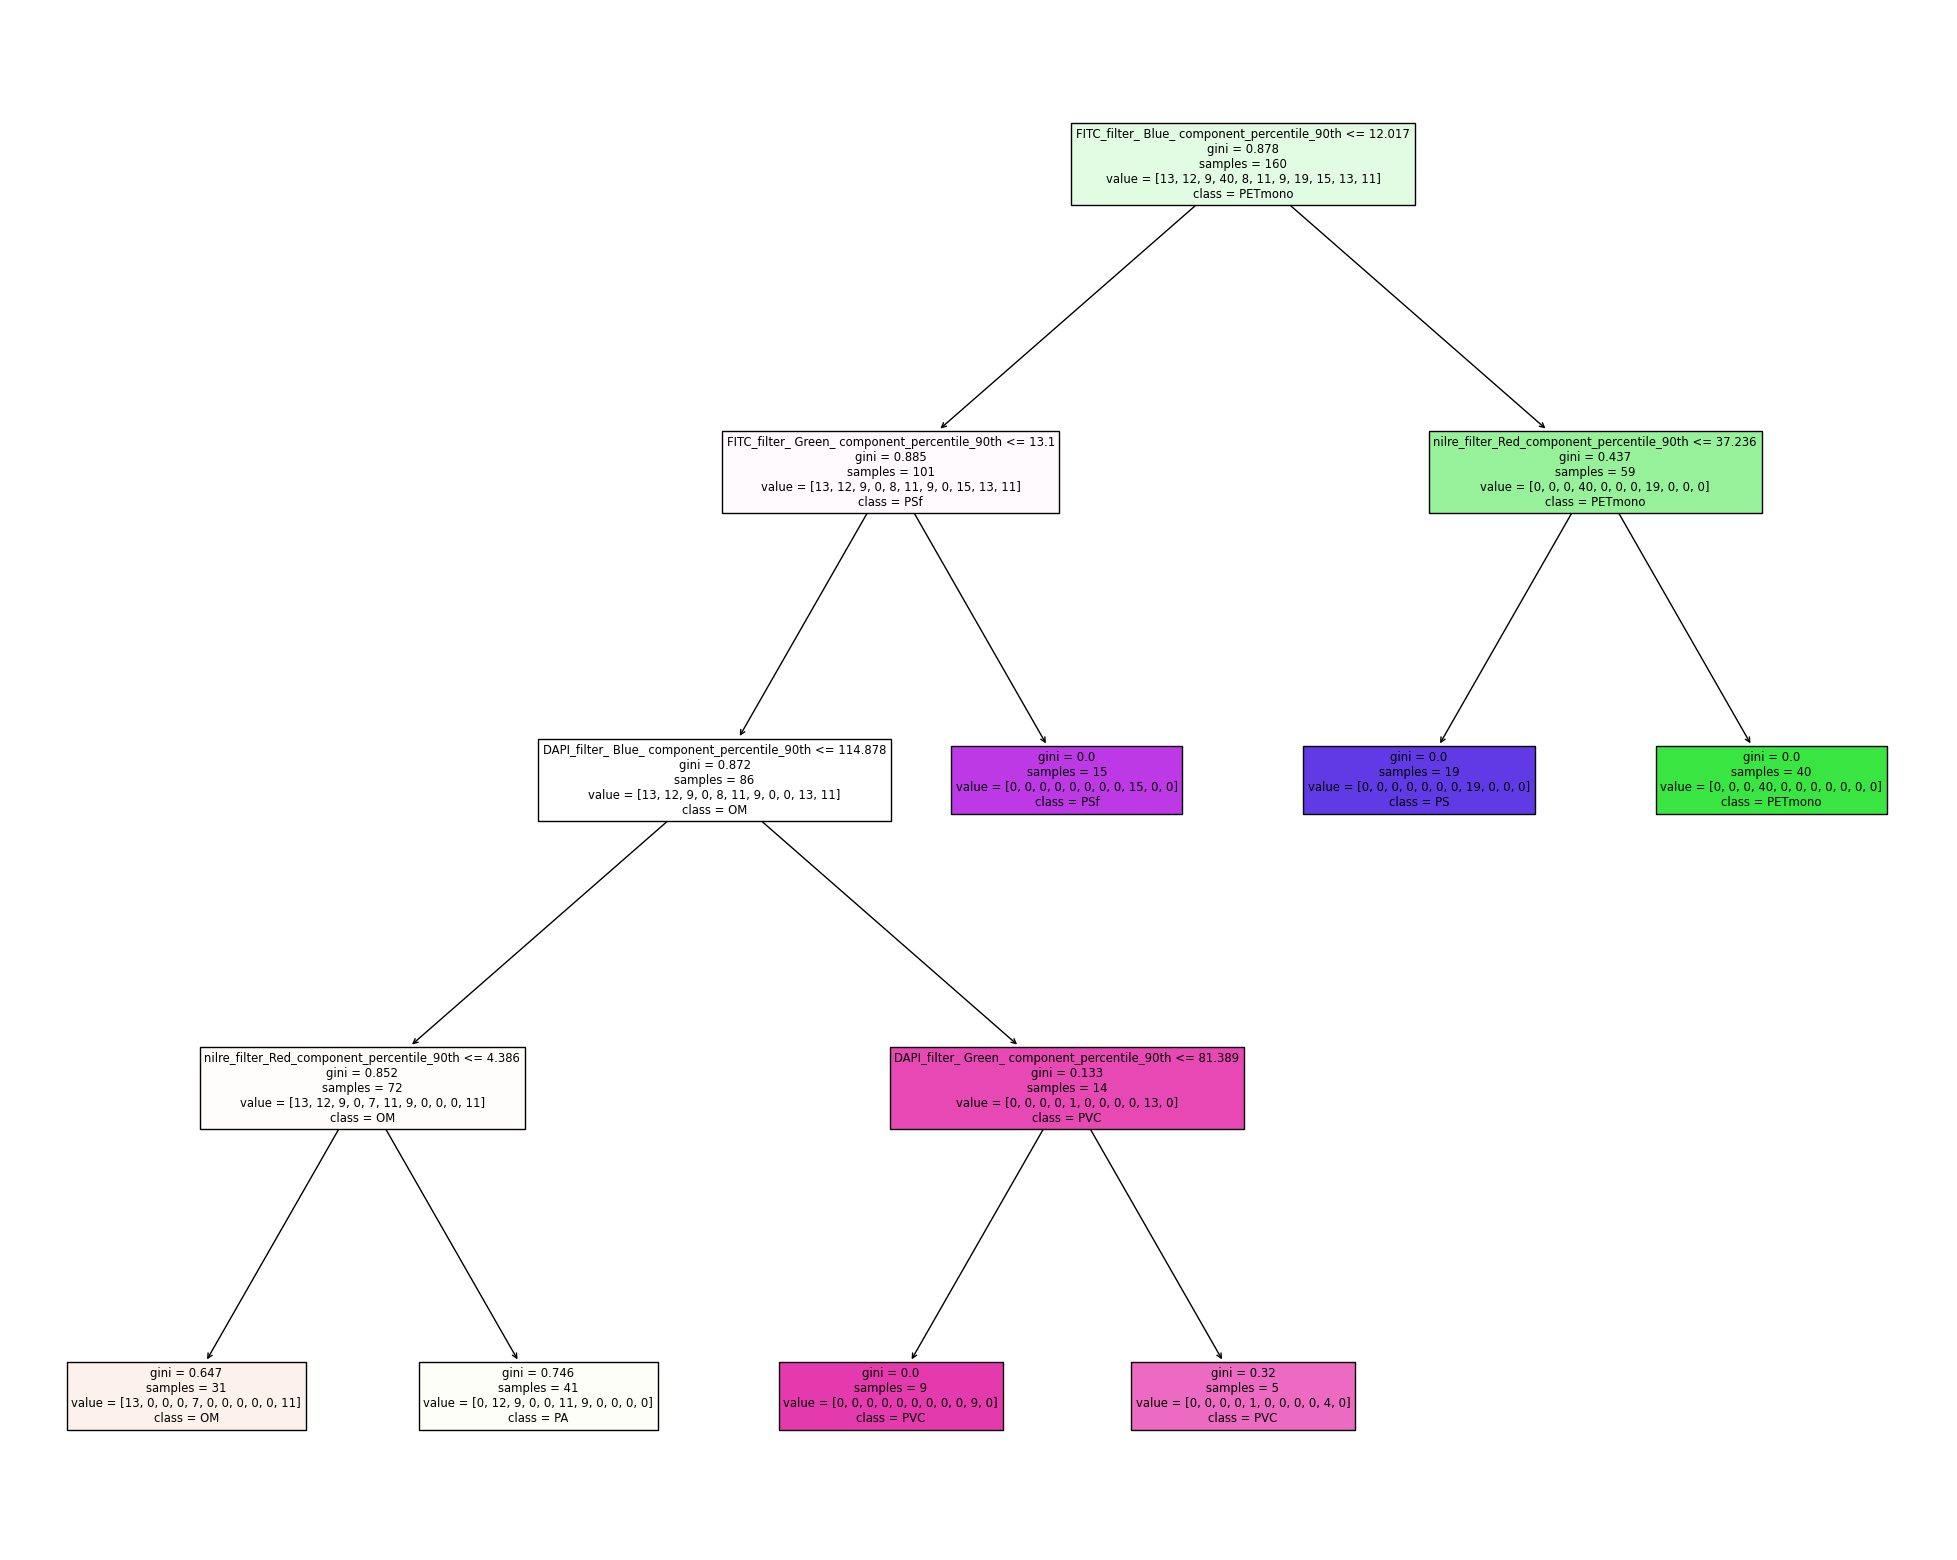

In [28]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20)) #indicaciones de las dimensiones del grafico

tree.plot_tree(arbol_microplastics, feature_names= list(X.columns.values),
               class_names=list(Y.values), filled=True) 
#variables predictoras X.columns.values, nombres de clases a predecir Y.values
#filled es para agregar color
plt.show

In [11]:
fig.savefig("micro.png")

PermissionError: [Errno 13] Permission denied: 'micro.png'

In [12]:
#prediccion de la respuesta para data set
Y_pred=arbol_microplastics.predict(X_test)
Y_pred

array(['PETmono', 'PP', 'PE', 'PE', 'PS', 'PE', 'PE', 'PS', 'PETmono',
       'PETp', 'PE', 'PP', 'PP', 'PA6', 'PETmono', 'PA6', 'PETp', 'PP',
       'PE', 'PE', 'PA', 'PA', 'PETmono', 'PE', 'PLA', 'PP', 'OM', 'PE',
       'PE', 'PETp', 'PE', 'OM', 'OM', 'PETmono', 'PP', 'PLA', 'PP',
       'PETmono', 'PA6', 'PS', 'PETp', 'PLA', 'PETmono', 'PE', 'PE', 'PE',
       'PETmono', 'PA6', 'PETp', 'PP', 'PETmono', 'PE', 'PP'],
      dtype=object)

In [13]:
#Para conocer la precision del modelo se crea la matriz de confusion
from sklearn.metrics import confusion_matrix

Matriz_de_confusion = confusion_matrix(Y_test, Y_pred)

Matriz_de_confusion

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [14]:
#para calcular la presicion global del modelo

import numpy as np
Presicion_Global = np.sum(Matriz_de_confusion.diagonal())/np.sum(Matriz_de_confusion)
Presicion_Global

0.7547169811320755

In [15]:
#calculo de prsicion por clase de no enfermos
Precision_No=((Matriz_de_confusion[0,0]))/sum(Matriz_de_confusion[0,])
Precision_No

1.0

In [16]:
#calculo de prsicion por clase de los enfermos
Precision_Si=((Matriz_de_confusion[1,1]))/sum(Matriz_de_confusion[1,])
Precision_Si

0.6666666666666666